In [12]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

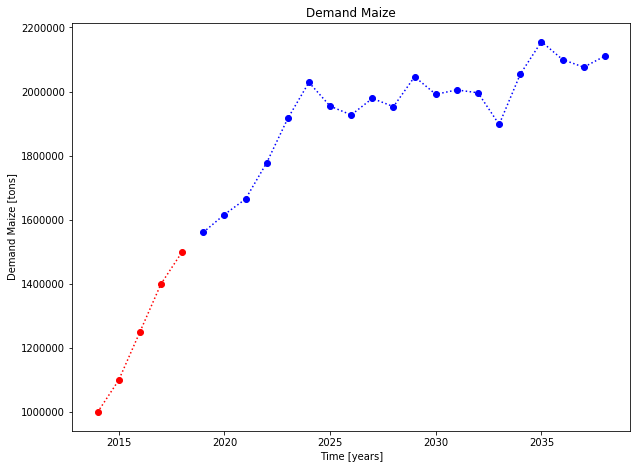

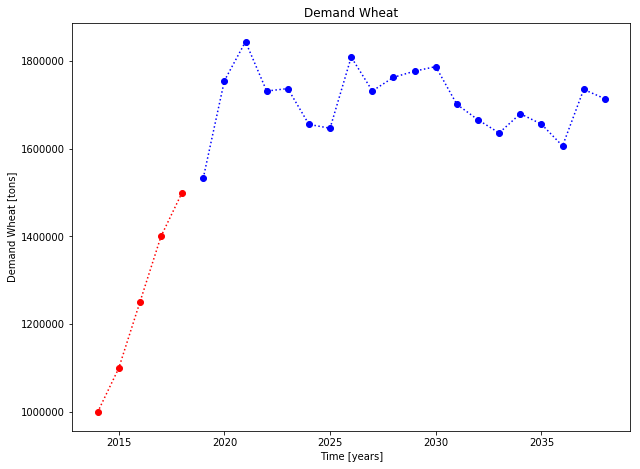

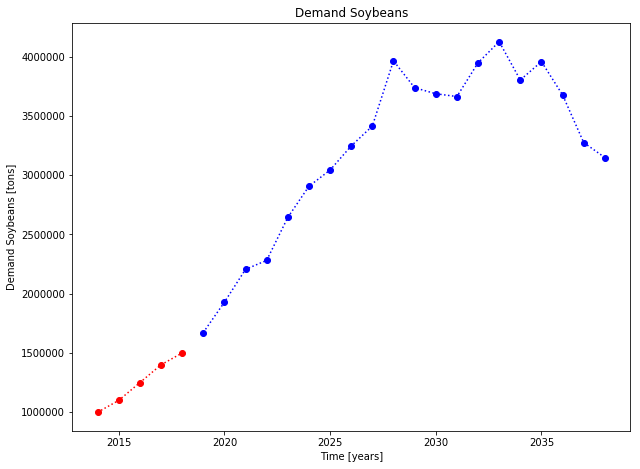

In [13]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random()
wheat.scenario_random()
soybeans.scenario_random()

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [14]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [15]:
Terminal = system.System(startyear = 2019, lifecycle = 20, elements = demand + vessels, debug=True,
                         crane_type_defaults=defaults.mobile_crane_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [16]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 104
     Handysize calls: 47
     Handymax calls: 33
     Panamax calls: 24
  Total cargo volume: 4765849
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 5.73548176171127
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 2.9010742141889683
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 1.956271698348201
  *** add Berth to elements
     Berth occupancy (after adding berth): 1.956271698348201
  *** add Quay to elements
     Berth occupancy (after adding quay):

## Report all elements

In [17]:
if Terminal.debug:
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Maize

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1560953
1   2020  1616547
2   2021  1664799
3   2022  1777837
4   2023  1916162
5   2024  2028787
6   2025  1954726
7   2026  1927174
8   2027  1978759
9   2028  1953067
10  2029  2046314
11  2030  1991584
12  2031  2005156
13  2032  1996126
14  2033  1897443
15  2034  2054249
16  2035  2155753
17  2036  2099875
18  2037  2076036
19  2038  2110725, 'handling_fee': 3, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Maize', 'id': '51e54a5c-4c29-11e9-8911-60f677ba2ce0'}

Wheat

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1532633
1   2020  1754281
2   2021  1843292
3   2022  1730831
4   2023  1736498
5   2024  1655048
6   2025  1646168
7   2026  1808185
8   2027  1731059
9   2

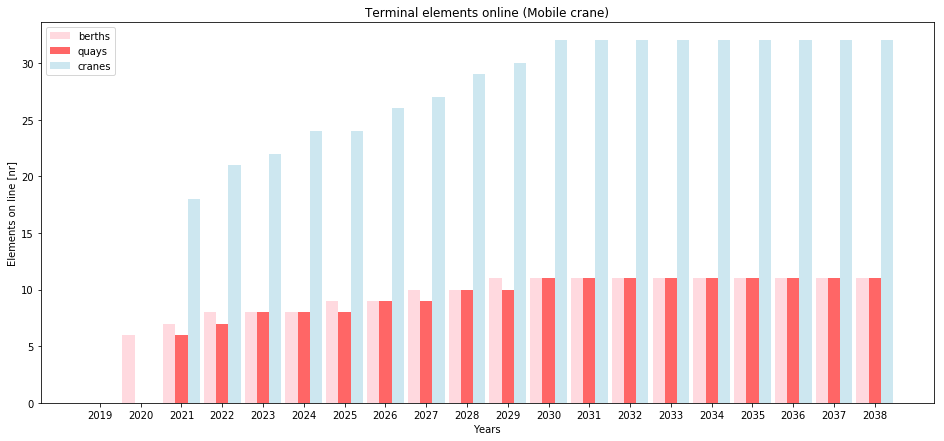

In [18]:
Terminal.terminal_elements_plot()

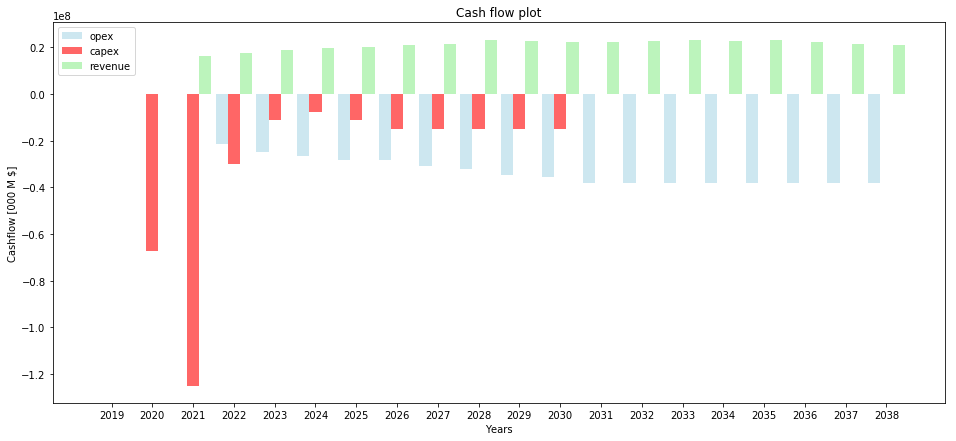

In [19]:
Terminal.cashflow_plot()

## SandBox

In [20]:
Terminal.NPV()

PV: [ 0.00000000e+00 -6.74409600e+07 -1.08739056e+08 -3.40479145e+07
 -1.73042501e+07 -1.42549073e+07 -1.97099008e+07 -2.26316758e+07
 -2.45906507e+07 -2.40975575e+07 -2.68430304e+07 -2.83023881e+07
 -1.60160660e+07 -1.52955590e+07 -1.51439960e+07 -1.55138060e+07
 -1.48147790e+07 -1.59731330e+07 -1.68652430e+07 -1.72036130e+07]
NPV: -514788486.15


## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [21]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [crane, screw],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)

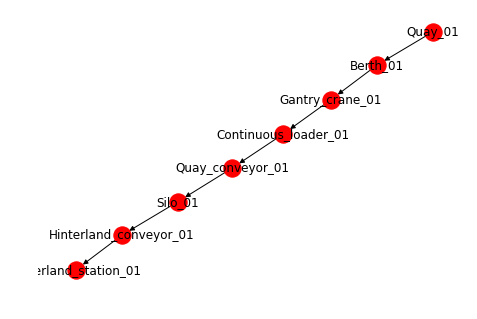

In [22]:
Terminal.plot_system()